<a href="https://colab.research.google.com/github/CillySu/CillySu/blob/main/intern_posts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
!pip install fuzzywuzzy python-levenshtein
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline


## Load excel file

In [ ]:
# Update the file path to your Excel file
file_path = 'posts.xlsx'
df = pd.read_excel(file_path)


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Data Validation extension is not supported and will be removed



## User Preference Weights

Below assign numbers between 0-10 where 10 signals your highest preference.

### Weight Selection

In [ ]:
# Updated Sub-Specialty weight preferences
weight_preferences = {
    'Specialty': {
      'Anaesthesia': 100,
      'Emergency Medicine': 5,
      'General Practice': 2,
      'Medicine': 8,
      'Obstetrics & Gynaecology': 8,
      'Paediatrics': 2,
      'Surgery': 8,
      'Psychiatry': 2,
      'Radiology': 10
      },
  'Sub-Specialty': {
      'Acute Medicine': 4,
      'Anaesthesiology': 10,
      'Breast Surgery': 4,
      'Cardiology': 9,
      'Cardiothoracic Surgery': 9,
      'Colorectal Surgery': 8,
      'Dermatology': 4,
      'Emergency Medicine': 9,
      'Endocrinology': 4,
      'Gastroenterology': 6,
      'General Internal Medicine': 7,
      'General Practice': 2,
      'General Surgery': 8,
      'Geriatric Medicine': 4,
      'GI Surgery': 8,
      'Haematology': 10,
      'Hepatobiliary Surgery': 2,
      'Hepatology': 2,
      'Infectious Diseases': 2,
      'Medical Oncology': 7,
      'Nephrology': 9,
      'Neurology': 8,
      'Neurosurgery': 1,
      'Obstetrics & Gynaecology': 8,
      'Ophthalmology': 6,
      'Oral and Maxillo-Facial Surgery': 4,
      'Orthopaedic Surgery': 2,
      'Otolaryngology': 6,
      'Paediatrics': 2,
      'Plastic, Reconstructive & Aesthetic Surgery': 4,
      'Psychiatry': 2,
      'Radiation Oncology': 2,
      'Radiology': 9,
      'Respiratory Medicine': 8,
      'Rheumatology': 8,
      'Stroke Medicine': 8,
      'Upper GI Surgery': 6,
      'Urology': 7,
      'Vascular Surgery': 7
         },
    'Location': {
        "Ardfert Medical Practice, Ardfert, Tralee": 0,
        "Bantry General Hospital": 0,
        "Beacon Hospital": 10,
        "Beaumont Hospital": 8,
        "Bon Secours Cork": 0,
        "Bon Secours Galway": 0,
        "Broad Lane Family Practice, Blackpool, Cork": 0,
        "Children's Hospital Ireland at Temple Street": 6,
        "Connolly Hospital": 4,
        "Coombe Primary Care": 6,
        "Cork University Hospital": 0,
        "Eden Park Medical, Tonlegee Road, Primary Care": 0,
        "Ennis Medical, Francis St, Ennis": 0,
        "Galway Clinic": 0,
        "Galway, Arlington House Medical Centre, Oranmore": 0,
        "Greystones Harbour Family Practice": 0,
        "Holyhill Medical Centre, St. Mary's Health Campus, Cork": 0,
        "Imokilly Medical Centre, Midleton": 0,
        "Letterkenny University Hospital": 0,
        "Linn Dara": 0,
        "LivingHealth Clinic Mitchelstown": 0,
        "Mallow General Hospital": 0,
        "Mater Misericordiae University Hospital": 10,
        "Mater Private Hospital": 10,
        "Mayo University Hospital": 10,
        "Mercers Medical Centre": 0,
        "Mercy University Hospital": 0,
        "Midland Regional Hospital, Portlaoise": 4,
        "Midland Regional Hospital, Tullamore": 4,
        "Mungret Medical Centre": 0,
        "Naas General Hospital": 6,
        "National Orthopaedic Hospital Cappagh": 10,
        "Nenagh University Hospital": 0,
        "Our Lady of Lourdes Hospital, Drogheda": 6,
        "Portiuncula University Hospital": 0,
        "Red House Family Practice, Mallow Primary Healthcare Centre": 0,
        "Regional Hospital Mullingar": 5,
        "Roscommon University Hospital": 0,
        "Seaholm Surgery, Skerries": 0,
        "Sligo GP Post, Dromahair, Co. Leitrim": 0,
        "Sligo University Hospital": 0,
        "Sligo University Hospital/Our Lady's Hospital, Manorhamilton": 0,
        "South Infirmary Victoria University Hospital": 0,
        "St. Columcille's Hospital": 0,
        "St. James's Hospital": 9,
        "St. John's Hospital Limerick/University Hospital Limerick": 0,
        "St. Luke's General Hospital, Kilkenny": 0,
        "St. Michael's Hospital": 9,
        "St. Stephen's Hospital Glanmire": 0,
        "St. Vincent's University Hospital": 10,
        "Tallaght University Hospital": 8,
        "The Brophy Family Practice": 0,
        "Tipperary University Hospital": 0,
        "Tully Family Practice": 0,
        "University Hospital Galway": 0,
        "University Hospital Galway, Claddagh Medical Centre": 0,
        "University Hospital Kerry": 0,
        "University Hospital Limerick": 0,
        "University Hospital Waterford": 0,
        "University Maternity Hospital, Limerick": 0,
        "Wexford General Hospital": 0
    }
}

# Whitelist and blacklist (empty in this case)
whitelist_specialties = []  # Empty whitelist
blacklist_locations = []    # Empty blacklist


### Cillian's Preferences

## Applying Weights


In [ ]:
from collections import defaultdict
from fuzzywuzzy import fuzz, process
import pandas as pd
import re

# Assume df is your DataFrame and weight_preferences is defined elsewhere

# New consolidated list of subspecialties
new_subspecialty_terms = [
    'Acute Medicine',
    'Anaesthesiology',
    'Breast Surgery',
    'Cardiology',
    'Cardiothoracic Surgery',
    'Colorectal Surgery',
    'Dermatology',
    'Emergency Medicine',
    'Endocrinology',
    'Gastroenterology',
    'General Internal Medicine',
    'General Practice',
    'General Surgery',
    'Geriatric Medicine',
    'GI Surgery',
    'Haematology',
    'Hepatobiliary Surgery',
    'Hepatology',
    'Infectious Diseases',
    'Medical Oncology',
    'Nephrology',
    'Neurology',
    'Neurosurgery',
    'Obstetrics & Gynaecology',
    'Ophthalmology',
    'Oral and Maxillo-Facial Surgery',
    'Orthopaedic Surgery',
    'Otolaryngology',
    'Paediatrics',
    'Plastic, Reconstructive & Aesthetic Surgery',
    'Psychiatry',
    'Radiation Oncology',
    'Radiology',
    'Respiratory Medicine',
    'Rheumatology',
    'Stroke Medicine',
    'Upper GI Surgery',
    'Urology',
    'Vascular Surgery'
]

old_to_new_subspecialty = {
    'Acute Medical Assessment Unit': 'Acute Medicine',
    'Acute Medicine': 'Acute Medicine',
    'Acute Medicine/Endocrinology': 'Acute Medicine',
    # Geriatric Medicine
    'Age-Related Healthcare': 'Geriatric Medicine',
    'Care of the Elderly': 'Geriatric Medicine',
    'Care of the Elderly/General Internal Medicine': 'Geriatric Medicine',
    'Geriatric Medicine': 'Geriatric Medicine',
    'Geriatric Medicine/General Internal Medicine': 'Geriatric Medicine',
    'Geriatric Medicine/Stroke': 'Geriatric Medicine',
    # Anaesthesiology
    'Anaesthesiology': 'Anaesthesiology',
    'Anaesthesiology/Critical Care': 'Anaesthesiology',
    'Anaesthesiology/Intensive Care Medicine': 'Anaesthesiology',
    'ICU': 'Anaesthesiology',
    # Breast Surgery
    'Breast Surgery': 'Breast Surgery',
    'Breast Surgery/General Surgery': 'Breast Surgery',
    # Cardiology
    'Cardiology': 'Cardiology',
    'Cardiology/General Internal Medicine': 'Cardiology',
    # Cardiothoracic Surgery
    'Cardiothoracic Surgery': 'Cardiothoracic Surgery',
    'Cardiothoracic Surgery/Cardiac Surgery': 'Cardiothoracic Surgery',
    'Cardiothoracic Surgery/Thoracic Surgery': 'Cardiothoracic Surgery',
    # Otolaryngology
    'E.N.T. Surgery': 'Otolaryngology',
    'Otolaryngology': 'Otolaryngology',
    # Endocrinology
    'Endocrinology & General Internal Medicine': 'Endocrinology',
    'Endocrinology & Diabetes Mellitus': 'Endocrinology',
    'Endocrinology/Diabetes Mellitus': 'Endocrinology',
    'Endocrinology/General Internal Medicine': 'Endocrinology',
    'ATIU/Stroke/Endocrinology': 'Endocrinology',
    # Gastroenterology
    'Gastroenterology': 'Gastroenterology',
    'Gastroenterology/General Internal Medicine': 'Gastroenterology',
    'Gastroenterology/Hepatology': 'Gastroenterology',
    # General Surgery
    'General Surgery': 'General Surgery',
    'General Surgery/Breast Surgery': 'General Surgery',
    'General Surgery/Colorectal Surgery': 'General Surgery',
    'General Surgery/GI': 'General Surgery',
    'General Surgery/Hepatobiliary Surgery': 'General Surgery',
    'General Surgery/Paediatrics Surgery': 'General Surgery',
    'General Surgery/Urology': 'General Surgery',
    'General Surgery/Vascular Surgery': 'General Surgery',
    # GI Surgery
    'GI Surgery': 'GI Surgery',
    'Lower GI/General Surgery': 'GI Surgery',
    # Nephrology
    'Nephrology': 'Nephrology',
    'Nephrology/General Internal Medicine': 'Nephrology',
    'Renal Medicine': 'Nephrology',
    # Neurology
    'Neurology': 'Neurology',
    'Neurology/Stroke Medicine': 'Neurology',
    # Psychiatry
    'Liaison Psychiatry': 'Psychiatry',
    'Liaison Psychiatry/Emergency Medicine': 'Psychiatry',
    'Psychiatry': 'Psychiatry',
    'Psychiatry/General Internal Medicine': 'Psychiatry',
    # Orthopaedic Surgery
    'Orthopaedic Surgery': 'Orthopaedic Surgery',
    'Trauma & Orthopaedic Surgery': 'Orthopaedic Surgery',
    # Medical Oncology
    'Medical Oncology': 'Medical Oncology',
    'Oncology': 'Medical Oncology',
    # Ophthalmology
    'Ophthalmic Surgery': 'Ophthalmology',
    'Ophthalmology': 'Ophthalmology',
    # Colorectal Surgery
    'Colorectal Surgery': 'Colorectal Surgery',
    # Dermatology
    'Dermatology': 'Dermatology',
    # Emergency Medicine
    'Emergency Medicine': 'Emergency Medicine',
    # Note: 'Emergency Surgery' was removed as per your instructions
    # General Internal Medicine
    'General Internal Medicine': 'General Internal Medicine',
    # General Practice
    'General Practice': 'General Practice',
    # Haematology
    'Haematology': 'Haematology',
    # Hepatobiliary Surgery
    'Hepatobiliary Surgery': 'Hepatobiliary Surgery',
    # Hepatology
    'Hepatology': 'Hepatology',
    # Infectious Diseases
    'Infectious Diseases': 'Infectious Diseases',
    'Infectious Diseases/General Internal Medicine': 'Infectious Diseases',
    # Paediatrics
    'Paediatrics': 'Paediatrics',
    # Plastic, Reconstructive & Aesthetic Surgery
    'Plastic, Reconstructive & Aesthetic Surgery': 'Plastic, Reconstructive & Aesthetic Surgery',
    # Radiation Oncology
    'Radiation Oncology': 'Radiation Oncology',
    # Radiology
    'Radiology': 'Radiology',
    # Respiratory Medicine
    'Respiratory Medicine': 'Respiratory Medicine',
    # Rheumatology
    'Rheumatology': 'Rheumatology',
    # Stroke Medicine
    'Stroke Medicine': 'Stroke Medicine',
    # Upper GI Surgery
    'Upper GI Surgery': 'Upper GI Surgery',
    # Urology
    'Urology': 'Urology',
    # Vascular Surgery
    'Vascular Surgery': 'Vascular Surgery',
    # Obstetrics & Gynaecology
    'Obstetrics & Gynaecology': 'Obstetrics & Gynaecology',
    # Oral and Maxillo-Facial Surgery
    'Oral and Maxillo-Facial Surgery': 'Oral and Maxillo-Facial Surgery',
    # Additional mappings not specified earlier
    'Respiratory Medicine': 'Respiratory Medicine',
    'Rheumatology': 'Rheumatology',
    'Stroke Medicine': 'Stroke Medicine',
    'Upper GI Surgery': 'Upper GI Surgery',
    'Urology': 'Urology',
    'Vascular Surgery': 'Vascular Surgery'
}


# Function to handle combined terms
def handle_combined_terms(subspecialty, separator):
    parts = re.split(separator, subspecialty)
    mapped_parts = [map_subspecialty_to_new_term(part.strip()) for part in parts]
    print(f"  Combined mapping for '{subspecialty}' -> {mapped_parts}")
    return '/'.join(mapped_parts)  # Adjust combining as per your needs

# Function to map 'Sub-Specialty' terms to the new consolidated list
def map_subspecialty_to_new_term(subspecialty):
    if pd.isnull(subspecialty):
        return subspecialty  # Return as is if NaN
    subspecialty = subspecialty.strip()

    # Check if term contains a combined specialty (e.g., '/')
    if '/' in subspecialty or '&' in subspecialty:
        return handle_combined_terms(subspecialty, r'/|&')

    # First, try to map using the old_to_new_subspecialty mapping
    if subspecialty in old_to_new_subspecialty:
        new_term = old_to_new_subspecialty[subspecialty]
        print(f"Mapping '{subspecialty}' to '{new_term}' using old-to-new mapping")
        return new_term
    else:
        # Fuzzy match the subspecialty to the new consolidated list
        match, score = process.extractOne(subspecialty, new_subspecialty_terms)
        if score >= 80:  # Threshold can be adjusted
            print(f"Mapping '{subspecialty}' to '{match}' via fuzzy matching (Score: {score})")
            return match
        else:
            # No good match found, return original term
            print(f"No good match for '{subspecialty}', keeping original")
            return subspecialty

# Apply the mapping function to the 'Sub-Specialty' column
df['Sub-Specialty'] = df['Sub-Specialty'].apply(map_subspecialty_to_new_term)
print(df.to_string())

# Now proceed with your existing code
# Modify apply_weighting to handle four location matches
def apply_weighting(row, weight_preferences, threshold=80):
    specialty_score = 0
    location_score = 0
    specialty_matches = []
    location_matches = []
    subspecialty_matches = []

    # Debug: show current row data being processed
    print(f"Processing row {row.name} with data: {row.to_dict()}")

    # Track best matches for Specialty, Sub-Specialty, and Location
    specialty_best_match = None
    subspecialty_closest_matches = []
    location_closest_matches = []

    # Always match one specialty
    if 'Specialty' in row and 'Specialty' in weight_preferences:
        value = str(row['Specialty']).lower()
        preferences = weight_preferences.get('Specialty', {})
        closest_matches = []
        for pref_key, pref_weight in preferences.items():
            pref_key_lower = pref_key.lower()
            match_score = fuzz.partial_ratio(pref_key_lower, value)
            closest_matches.append((pref_key_lower, match_score, pref_weight))

        # Sort by match score descending and take the best match (top 1)
        closest_matches.sort(key=lambda x: -x[1])
        if closest_matches:
            specialty_best_match = closest_matches[0]
            specialty_score += specialty_best_match[2]  # Take the weight of the best match
            reason = f"Specialty: {specialty_best_match[0]} ({specialty_best_match[2]})"
            print(f"  Best Specialty match: {reason}, Score added: {specialty_best_match[2]}")
            specialty_matches.append(reason)

    # Always match four subspecialties
    if 'Sub-Specialty' in row and 'Sub-Specialty' in weight_preferences:
        value = str(row['Sub-Specialty']).lower()
        preferences = weight_preferences.get('Sub-Specialty', {})
        closest_matches = []
        subspecialties = re.split(r'/|&', value)
        for sub in subspecialties:
            sub = sub.strip()
            for pref_key, pref_weight in preferences.items():
                pref_key_lower = pref_key.lower()
                match_score = fuzz.partial_ratio(pref_key_lower, sub)
                closest_matches.append((pref_key_lower, match_score, pref_weight))

        # Sort by match score descending and take the top 4 matches
        closest_matches.sort(key=lambda x: -x[1])
        closest_matches = closest_matches[:4]  # Always select exactly 4 matches
        for match in closest_matches:
            reason = f"Sub-Specialty: {match[0]} ({match[2]})"
            print(f"  Sub-Specialty match: {reason}, Score added: {match[2]}")
            subspecialty_matches.append(reason)
            specialty_score += match[2]

    # Always match four locations
    if 'Location' in row and 'Location' in weight_preferences:
        value = str(row['Location']).lower()
        preferences = weight_preferences.get('Location', {})
        closest_matches = []
        # Split the 'Location' field into individual locations
        locations = re.split(r'/|&', value)
        for loc in locations:
            loc = loc.strip()
            for pref_key, pref_weight in preferences.items():
                pref_key_lower = pref_key.lower()
                match_score = fuzz.partial_ratio(pref_key_lower, loc)
                closest_matches.append((pref_key_lower, match_score, pref_weight))

        # Sort by match score descending and take the top 4 matches
        closest_matches.sort(key=lambda x: -x[1])
        closest_matches = closest_matches[:4]  # Always select exactly 4 location matches
        for match in closest_matches:
            reason = f"Location: {match[0]} ({match[2]})"
            print(f"  Location match: {reason}, Score added: {match[2]}")
            location_matches.append(reason)
            location_score += match[2]

    return specialty_score, location_score, ", ".join(specialty_matches + subspecialty_matches + location_matches)


# Create a list to hold row information
scoring_data = []

# Apply weighting to each row and collect the scoring details
for idx, row in df.iterrows():
    post_reference = row['Post reference']
    print(f"\nScoring rotation: {post_reference}")

    specialty_score, location_score, match_details = apply_weighting(row, weight_preferences)

    # Append the scoring data
    scoring_data.append({
        'Row': idx,
        'Specialty Score': specialty_score,
        'Location Score': location_score,
        'Matches': match_details
    })

    # Print final scores for this row (rotation)
    print(f"Final scores for rotation {post_reference}:")
    print(f"  Specialty Score: {specialty_score}")
    print(f"  Location Score: {location_score}")
    print(f"  Matches: {match_details}")
    print("-" * 40)

# Convert the scoring data into a DataFrame
scoring_df = pd.DataFrame(scoring_data)

# Add the 'Specialty Score' and 'Location Score' columns to the original DataFrame
df['Specialty Score'] = scoring_df['Specialty Score']
df['Location Score'] = scoring_df['Location Score']

# Optionally: Combine 'Specialty Score' and 'Location Score' into a general 'Score'
df['Score'] = df['Specialty Score'] + df['Location Score']

# Sum scores per 'Post reference' for Specialty and Location separately
post_scores = df.groupby('Post reference')[['Specialty Score', 'Location Score']].sum().reset_index()
post_scores.rename(columns={'Specialty Score': 'Total Specialty Score', 'Location Score': 'Total Location Score'}, inplace=True)

# Merge total scores back to the original DataFrame
df = df.merge(post_scores, on='Post reference', suffixes=('', '_total'))

# If you need to sum and use a combined 'Score', use this section
if 'Score' in df.columns:
    # Sum combined score per 'Post reference'
    post_scores_combined = df.groupby('Post reference')['Score'].sum().reset_index()
    post_scores_combined.rename(columns={'Score': 'Total Score'}, inplace=True)

    # Merge combined total score back into the DataFrame
    df = df.merge(post_scores_combined, on='Post reference', suffixes=('', '_total_combined'))


Streaming output truncated to the last 5000 lines.
  Matches: Specialty: surgery (8), Sub-Specialty: otolaryngology (6), Sub-Specialty: urology (7), Sub-Specialty: cardiology (9), Sub-Specialty: neurology (8), Location: st. james's hospital (9), Location: st. john's hospital limerick/university hospital limerick (0), Location: st. michael's hospital (9), Location: st. stephen's hospital glanmire (0)
----------------------------------------

Scoring rotation: DSE/754
Processing row 3012 with data: {'Post reference': 'DSE/754', 'Rotation': 'Rotation 1', 'Duration (months)': 3, 'Location': "St. James's Hospital", 'Specialty': 'Surgery', 'Sub-Specialty': 'Otolaryngology'}
  Best Specialty match: Specialty: surgery (8), Score added: 8
  Sub-Specialty match: Sub-Specialty: otolaryngology (6), Score added: 6
  Sub-Specialty match: Sub-Specialty: urology (7), Score added: 7
  Sub-Specialty match: Sub-Specialty: cardiology (9), Score added: 9
  Sub-Specialty match: Sub-Specialty: neurology (8),

In [ ]:
# Sort posts by total score
sorted_posts = df.sort_values(by='Total Score', ascending=False)


In [ ]:
# Display the sorted posts with their total scores
sorted_posts.reset_index(drop=True, inplace=True)
sorted_posts

,Post reference,Rotation,Duration (months),Location,Specialty,Sub-Specialty,Specialty Score,Location Score,Score,Total Specialty Score,Total Location Score,Total Score
0,DNE/248,Rotation 2,3,Beaumont Hospital,Medicine,Endocrinology/Diabetes Mellitus,34,26,60,224,104,328
1,DNE/250,Rotation 2,3,Beaumont Hospital,Surgery,Neurosurgery,32,26,58,224,104,328
2,DNE/248,Rotation 1,3,Beaumont Hospital,Medicine,Neurology,35,26,61,224,104,328
3,DNE/247,Rotation 2,3,Beaumont Hospital,Medicine,Neurology,35,26,61,224,104,328
4,DNE/247,Rotation 3,3,Beaumont Hospital,Surgery,Neurosurgery,32,26,58,224,104,328
...,...,...,...,...,...,...,...,...,...,...,...,...
3301,MWT/775,Rotation 2,4,University Hospital Limerick,Surgery,Trauma/Orthopaedic Surgery,33,0,33,79,0,79
3302,MWT/775,Rotation 1,4,University Hospital Limerick,Paediatrics,Paediatrics,18,0,18,79,0,79
3303,MWT/774,Rotation 3,4,University Hospital Limerick,Surgery,Trauma/Orthopaedic Surgery,33,0,33,79,0,79
3304,MWT/774,Rotation 2,4,University Hospital Limerick,Paediatrics,Paediatrics,18,0,18,79,0,79


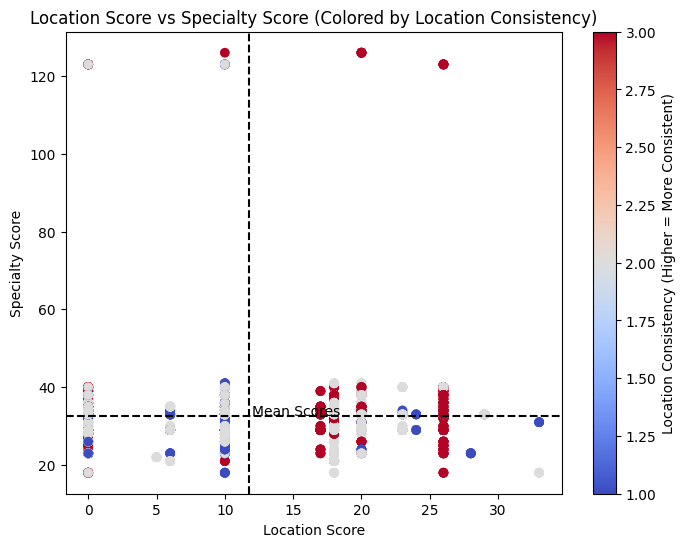

In [ ]:
!pip install mplcursors
import mplcursors
import matplotlib.pyplot as plt

# Calculate location consistency based on the number of unique locations per post reference
df_grouped = df.groupby('Post reference')['Location'].nunique().reset_index()

# Invert the consistency score, so higher consistency (fewer unique locations) gets a higher score
df_grouped['Consistency Score'] = 4 - df_grouped['Location']

# Merge the consistency score back into the original df
df = pd.merge(df, df_grouped[['Post reference', 'Consistency Score']], on='Post reference', how='left')

# Calculate the mean for dynamic location midpoint
location_midpoint = df['Location Score'].mean()  # Dynamic midpoint for Location Score
specialty_midpoint = df['Specialty Score'].mean()  # Fixed midpoint for Specialty Score

plt.figure(figsize=(8, 6))

# Create scatter plot with 'Consistency Score' used for color coding (intensity)
scatter = plt.scatter(df['Location Score'], df['Specialty Score'], c=df['Consistency Score'], cmap='coolwarm')

# Set labels and title
plt.xlabel('Location Score')
plt.ylabel('Specialty Score')
plt.title('Location Score vs Specialty Score (Colored by Location Consistency)')

# Add dynamic line for Location Score and fixed line for Specialty Score
plt.axvline(x=location_midpoint, color='black', linestyle='--')  # Vertical line at dynamic midpoint of Location Score
plt.axhline(y=specialty_midpoint, color='black', linestyle='--')  # Horizontal line at dynamic midpoint for Specialty Score

# Add labels to the intersection of the dashed lines
plt.text(location_midpoint + 0.2, specialty_midpoint + 0.2, 'Mean Scores', color='black', fontsize=10)

# Activate mplcursors to display a tooltip on hover over points in the scatter plot
cursor = mplcursors.cursor(hover=True)

# Customize the tooltip to display additional information from the DataFrame
@cursor.connect("add")
def on_add(sel):
    # Get index of the selected point based on the scatter's offsets
    index = sel.target.index  # If this doesn't work, try scatter.get_offsets()[sel.index]
    sel.annotation.set(text=f"Location Score: {df['Location Score'].iloc[index]}\n"
                            f"Specialty Score: {df['Specialty Score'].iloc[index]}\n"
                            f"Post Reference: {df['Post Reference'].iloc[index]}\n"
                            f"Location Consistency: {df['Consistency Score'].iloc[index]}")
    sel.annotation.get_bbox_patch().set_facecolor('lightblue')  # Optional: Change tooltip background color
    sel.annotation.get_bbox_patch().set_alpha(0.9)  # Set transparency for better visibility

# Show the color bar to indicate consistency levels
plt.colorbar(scatter, label='Location Consistency (Higher = More Consistent)')
plt.show()

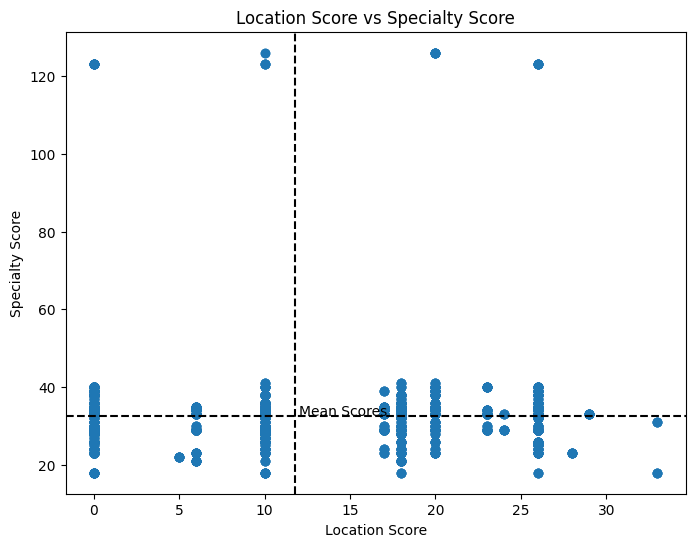

In [ ]:
!pip install mplcursors
# @title Location Score vs Specialty Score (Dynamic Location Midpoint, Fixed Specialty Midpoint)

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

# Calculate the mean for dynamic location midpoint
location_midpoint = df['Location Score'].mean()  # Dynamic midpoint for Location Score
specialty_midpoint = df['Specialty Score'].mean()  # Fixed midpoint for Specialty Score

plt.figure(figsize=(8, 6))

# Create scatter plot
scatter = plt.scatter(df['Location Score'], df['Specialty Score'])

# Set labels and title
plt.xlabel('Location Score')
plt.ylabel('Specialty Score')
plt.title('Location Score vs Specialty Score')


# Add dynamic line for Location Score and fixed line for Specialty Score
plt.axvline(x=location_midpoint, color='black', linestyle='--')  # Vertical line at dynamic midpoint of Location Score
plt.axhline(y=specialty_midpoint, color='black', linestyle='--')  # Horizontal line at dynamic midpoint for Specialty Score

# Add labels to the intersection of the dashed lines
# The intersection point is (location_midpoint, specialty_midpoint)
# Set the text to be offset by (+2, 2) from this point
plt.text(location_midpoint + 0.2, specialty_midpoint + 0.2, 'Mean Scores', color='black', fontsize=10)

# Show the plot
plt.show()


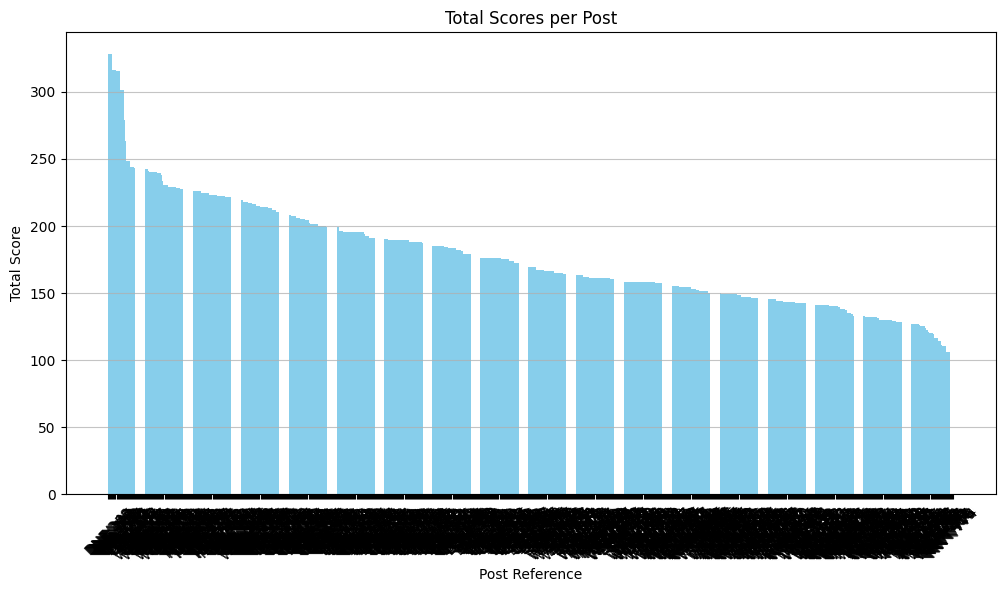

In [ ]:
# Bar chart of total scores per post
plt.figure(figsize=(12, 6))
plt.bar(sorted_posts['Post reference'], sorted_posts['Total Score'], color='skyblue')
plt.xlabel('Post Reference')
plt.ylabel('Total Score')
plt.title('Total Scores per Post')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


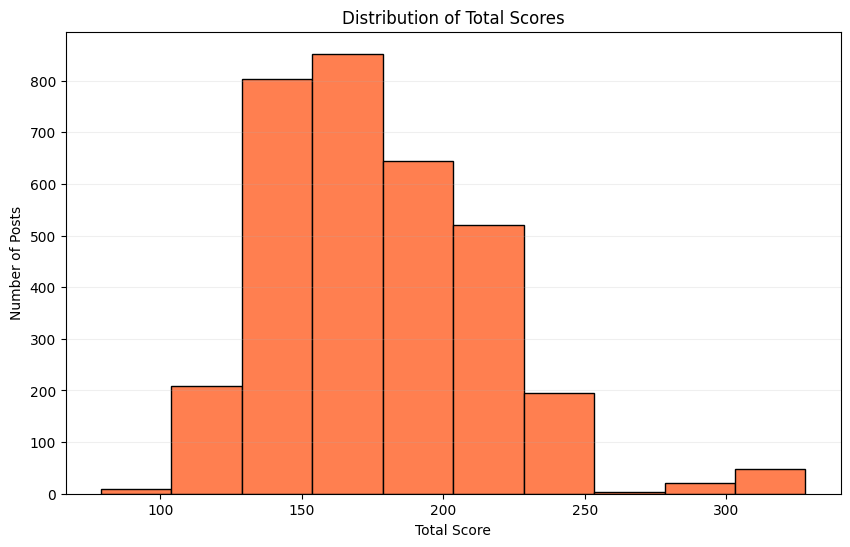

In [ ]:
# Histogram of total scores
plt.figure(figsize=(10, 6))
sorted_posts['Total Score'].plot(kind='hist', bins=10, color='coral', edgecolor='black')
plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Number of Posts')
plt.grid(axis='y', alpha=0.2)
plt.show()


In [ ]:
# Get the top 100 posts
top_posts = sorted_posts.head(100)['Post reference']

# Filter the DataFrame for these posts
top_posts_df = df[df['Post reference'].isin(top_posts)]

# Display the rotations for the top posts
# Removed 'Total Score' from the list of columns to sort by
top_posts_df.sort_values(by=['Post reference', 'Rotation'], ascending=[True, True]).reset_index(drop=True)

,Post reference,Rotation,Duration (months),Location,Specialty,Sub-Specialty,Specialty Score,Location Score,Score,Total Specialty Score,Total Location Score,Total Score,Consistency Score
0,DML/046,Rotation 1,3,Mater Misericordiae University Hospital,Medicine,Cardiology,34,20,54,221,80,301,3
1,DML/046,Rotation 2,3,Mater Misericordiae University Hospital,Medicine,Nephrology,35,20,55,221,80,301,3
2,DML/046,Rotation 3,3,Mater Misericordiae University Hospital,Anaesthesia,Anaesthesia/Acute Medicine,126,20,146,221,80,301,3
3,DML/046,Rotation 4,3,Mater Misericordiae University Hospital,Surgery,Vascular Surgery,26,20,46,221,80,301,3
4,DML/047,Rotation 1,3,Mater Misericordiae University Hospital,Surgery,Vascular Surgery,26,20,46,221,80,301,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,DNE/730,Rotation 4,3,"Our Lady of Lourdes Hospital, Drogheda",Medicine,GIM/Infectious Diseases,25,26,51,212,104,316,3
100,DNE/731,Rotation 1,3,"Our Lady of Lourdes Hospital, Drogheda",Surgery,General Surgery,29,26,55,212,104,316,3
101,DNE/731,Rotation 2,3,"Our Lady of Lourdes Hospital, Drogheda",Anaesthesia,Anaesthesia,123,26,149,212,104,316,3
102,DNE/731,Rotation 3,3,"Our Lady of Lourdes Hospital, Drogheda",Medicine,GIM/Infectious Diseases,25,26,51,212,104,316,3
